In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from beamline34IDC.util.shadow.common import \
    plot_shadow_beam_spatial_distribution, get_shadow_beam_spatial_distribution,\
    load_shadow_beam, PreProcessorFiles, EmptyBeamException
import beamline34IDC.optimization.common as opt_common
import beamline34IDC.optimization.movers as movers
from beamline34IDC.util import clean_up
import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm
import shutil
import glob
import dill

In [3]:
%matplotlib inline

In [4]:
DEFAULT_RANDOM_SEED = np.random.randint(100000)
print(DEFAULT_RANDOM_SEED)

75219


In [5]:
base_dir = '/gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/'
orig_work_dir = f'{base_dir}/work_directory'
temp_work_dir = f'{base_dir}/tmp_work_dir_{DEFAULT_RANDOM_SEED}'

In [7]:
if not os.path.isdir(temp_work_dir):
    os.mkdir(temp_work_dir)

In [8]:
dat_files = glob.glob(f'{orig_work_dir}/*.dat')
for df in dat_files:
    shutil.copy(df, temp_work_dir)

In [9]:
os.chdir(temp_work_dir)

In [10]:
input_beam_path = "primary_optics_system_beam.dat"

In [11]:
move_motors = ['hkb_4', 'vkb_4']

In [12]:
motors_str = move_motors[0] if len(move_motors) == 1 else '_'.join(move_motors)
fig_save_path = f'{orig_work_dir}/figures/{motors_str}_test_gps/'
if not os.path.isdir(fig_save_path):
    os.mkdir(fig_save_path)

In [44]:
# Focusing Optics System -------------------------
#with redirected_output():
focusing_system= opt_common.reinitialize(input_beam_path=input_beam_path)

9.283169051530985e-05


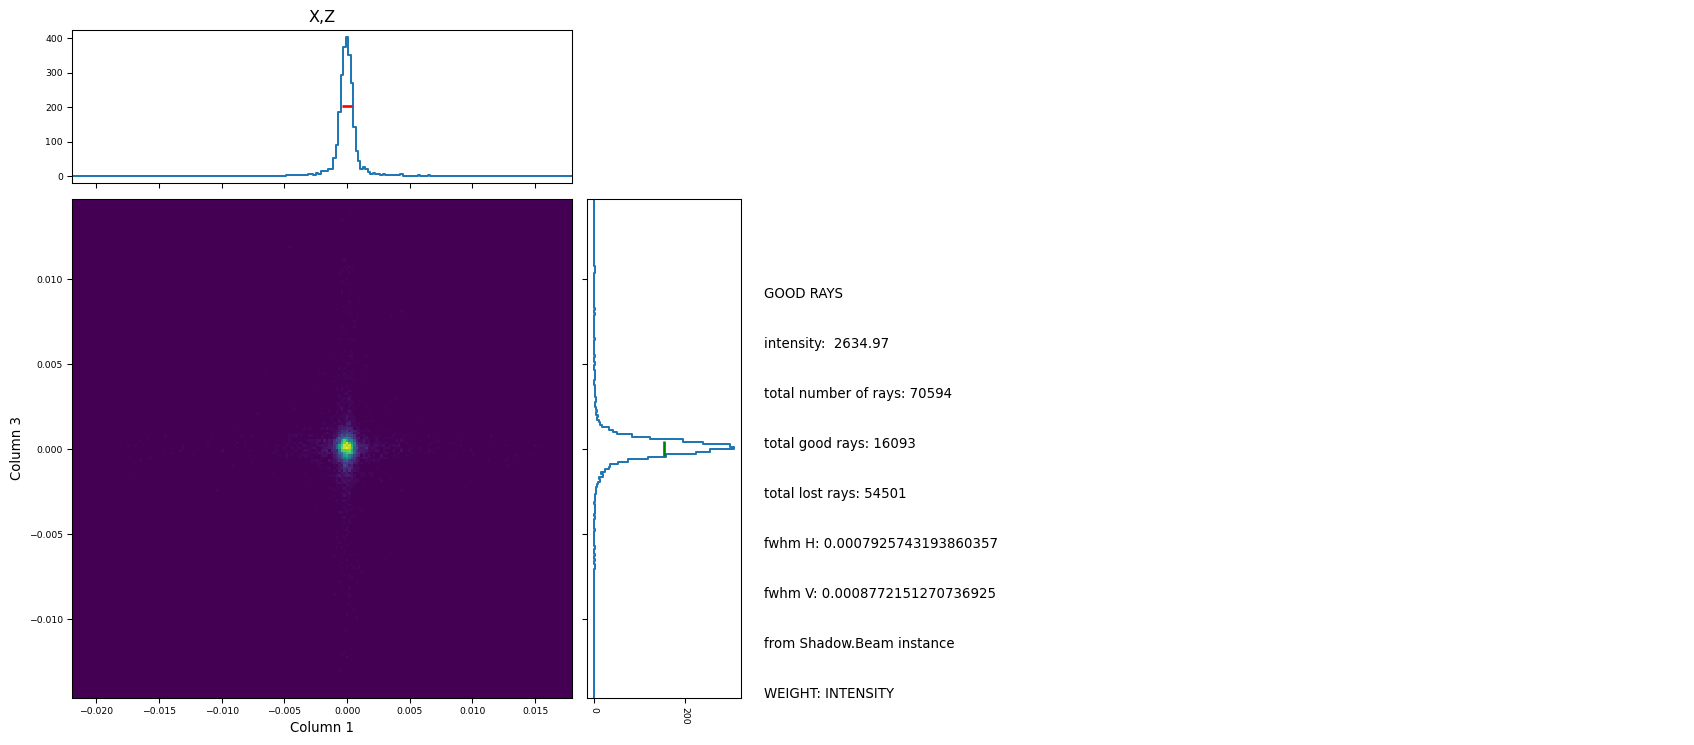

In [16]:
centroid, out_beam, hist, dw = opt_common.get_centroid_distance(focusing_system=focusing_system, 
                                                                random_seed=DEFAULT_RANDOM_SEED)
print(centroid)
_ = plot_shadow_beam_spatial_distribution(out_beam)

In [45]:
initial_absolute_positions = np.array(movers.get_absolute_positions(focusing_system, move_motors))
print(initial_absolute_positions)

[0. 0.]


In [70]:
translations = np.random.uniform(-0.1, 0.1, size=2)

In [71]:
test_absolute_movements = initial_absolute_positions + translations
print("Initial motor positions are", test_absolute_movements)
focusing_system = movers.move_motors(focusing_system, move_motors, 
                                     test_absolute_movements,
                                     movement='absolute')

Initial motor positions are [0.01230889 0.02048121]


In [79]:
gp_opt_trial = opt_common.OptimizationCommon(focusing_system, 
                                             motor_types=move_motors, 
                                             random_seed=DEFAULT_RANDOM_SEED,
                                             initial_motor_positions=test_absolute_movements)

In [81]:
gp_opt_trial.set_gaussian_process_optimizer(bounds=[[-0.2, 0.2],[-0.2,0.2]], n_calls=50)

In [82]:
%%time
results, guesses, solutions, success = gp_opt_trial.trials(n_guesses=1, verbose=True)

Initial loss is 0.02404260949925696
motors ['hkb_4', 'vkb_4'] trans [-0.0136871  -0.00441119] current loss 0.016305474058454915
motors ['hkb_4', 'vkb_4'] trans [0.13065571 0.10429244] current loss 0.18889095371704023
motors ['hkb_4', 'vkb_4'] trans [0.13668637 0.12161234] current loss 0.2050749487848066


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


motors ['hkb_4', 'vkb_4'] trans [ 0.09107183 -0.19688379] current loss 0.2031095198189945
motors ['hkb_4', 'vkb_4'] trans [0.0905955 0.1189361] current loss 0.1725306452141336
motors ['hkb_4', 'vkb_4'] trans [0.15396973 0.17143241] current loss 10000.0
motors ['hkb_4', 'vkb_4'] trans [-0.13239664 -0.06321608] current loss 0.1271783358134896
motors ['hkb_4', 'vkb_4'] trans [-0.15577374  0.01986354] current loss 0.14869991499901172
motors ['hkb_4', 'vkb_4'] trans [ 0.01964964 -0.17616665] current loss 0.15822307803396526
motors ['hkb_4', 'vkb_4'] trans [-0.05955097 -0.07173592] current loss 0.06946593161367447
motors ['hkb_4', 'vkb_4'] trans [-0.2       -0.1255727] current loss 0.21002190169995913
motors ['hkb_4', 'vkb_4'] trans [0.12961318 0.11674757] current loss 0.1957453711257743
motors ['hkb_4', 'vkb_4'] trans [0.13301366 0.11983472] current loss 0.20091118192393195
motors ['hkb_4', 'vkb_4'] trans [0.13289346 0.11985951] current loss 0.200365993639831
motors ['hkb_4', 'vkb_4'] trans

/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


motors ['hkb_4', 'vkb_4'] trans [0.15512618 0.11971813] current loss 0.1961989107091992
motors ['hkb_4', 'vkb_4'] trans [0.1420333  0.11973296] current loss 0.1982137508884279
motors ['hkb_4', 'vkb_4'] trans [0.2        0.10648949] current loss 10000.0
motors ['hkb_4', 'vkb_4'] trans [0.0477743  0.07624896] current loss 0.11338906390812625
motors ['hkb_4', 'vkb_4'] trans [-0.13691757  0.06503704] current loss 0.1506652305328805
motors ['hkb_4', 'vkb_4'] trans [-0.0440108  -0.11627048] current loss 0.10051125464455406
motors ['hkb_4', 'vkb_4'] trans [-0.03750794  0.04088006] current loss 0.06604903921793978
motors ['hkb_4', 'vkb_4'] trans [-0.16658919 -0.09440983] current loss 0.1706463025804884
motors ['hkb_4', 'vkb_4'] trans [-0.10077277 -0.15256796] current loss 0.15837479544367494
motors ['hkb_4', 'vkb_4'] trans [ 0.06620415 -0.14173836] current loss 0.14399012532232425
motors ['hkb_4', 'vkb_4'] trans [ 0.17438247 -0.16750104] current loss 10000.0


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


motors ['hkb_4', 'vkb_4'] trans [-0.0807022 -0.2      ] current loss 0.19155018795040357
motors ['hkb_4', 'vkb_4'] trans [ 0.1049836  -0.09500055] current loss 0.13840372401155052
motors ['hkb_4', 'vkb_4'] trans [ 0.10561887 -0.0430828 ] current loss 0.11966308018205686
Loss is 0.016305474058454915 for x [-0.013687098329533465, -0.004411185704254639] and min acceptable value is 0.0005
Solution is not acceptable.
CPU times: user 4min 3s, sys: 6min 32s, total: 10min 35s
Wall time: 2min 46s


In [52]:
solutions

[0.06107140918208537, 0.03773501860081993]

In [83]:
%%time
focusing_system = movers.move_motors(focusing_system, move_motors, 
                                     test_absolute_movements,
                                     movement='absolute')
gp_opt_trial = opt_common.OptimizationCommon(focusing_system, 
                                             motor_types=move_motors, 
                                             random_seed=DEFAULT_RANDOM_SEED,
                                             initial_motor_positions=test_absolute_movements)
gp_opt_trial.set_gaussian_process_optimizer(bounds=[[-0.2, 0.2],[-0.2,0.2]], n_calls=50)

results, guesses, solutions, success = gp_opt_trial.trials(n_guesses=1, 
                                                           verbose=True, 
                                                           optimizer_extra_options={'n_jobs':4})

Initial loss is 0.02404260949925696
motors ['hkb_4', 'vkb_4'] trans [ 0.06729688 -0.16932895] current loss 0.16813597811854084
motors ['hkb_4', 'vkb_4'] trans [-0.19752042 -0.02908063] current loss 0.18229465346815524
motors ['hkb_4', 'vkb_4'] trans [ 0.17023301 -0.14899313] current loss 10000.0
motors ['hkb_4', 'vkb_4'] trans [ 0.03880207 -0.01861262] current loss 0.051016512111869944
motors ['hkb_4', 'vkb_4'] trans [ 0.1506325  -0.07872209] current loss 0.15344529410574984
motors ['hkb_4', 'vkb_4'] trans [ 0.19165436 -0.02040971] current loss 10000.0
motors ['hkb_4', 'vkb_4'] trans [-0.01520661 -0.05939956] current loss 0.038845685643439556


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Po

motors ['hkb_4', 'vkb_4'] trans [0.11354129 0.15997213] current loss 0.6613901819381527


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


motors ['hkb_4', 'vkb_4'] trans [-0.11111245  0.14666271] current loss 0.19389051670323154
motors ['hkb_4', 'vkb_4'] trans [-0.01649587 -0.07036294] current loss 0.04983387221639763
motors ['hkb_4', 'vkb_4'] trans [0.1338221  0.16571977] current loss 10000.0


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Po

motors ['hkb_4', 'vkb_4'] trans [0.11336749 0.15988798] current loss 0.661028229755545
motors ['hkb_4', 'vkb_4'] trans [ 0.15048383 -0.07952103] current loss 0.15154128041362516
motors ['hkb_4', 'vkb_4'] trans [-0.01585067 -0.06488313] current loss 0.044338761898610794
motors ['hkb_4', 'vkb_4'] trans [ 0.15052422 -0.0814695 ] current loss 0.15235324160070488
motors ['hkb_4', 'vkb_4'] trans [-0.0158499  -0.06487408] current loss 0.044329386535021394
motors ['hkb_4', 'vkb_4'] trans [ 0.15060804 -0.0838292 ] current loss 0.15552849974130054


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Po

motors ['hkb_4', 'vkb_4'] trans [0.11332165 0.15957434] current loss 0.6608839044691135
motors ['hkb_4', 'vkb_4'] trans [ 0.15060605 -0.08370037] current loss 0.15547151650511487
motors ['hkb_4', 'vkb_4'] trans [ 0.06711527 -0.16846338] current loss 0.16737474636273209
motors ['hkb_4', 'vkb_4'] trans [-0.01584924 -0.06484337] current loss 0.04429872534337754
motors ['hkb_4', 'vkb_4'] trans [ 0.15060923 -0.08504207] current loss 0.15605329284629904
motors ['hkb_4', 'vkb_4'] trans [ 0.03893619 -0.0193772 ] current loss 0.05112752922597643
motors ['hkb_4', 'vkb_4'] trans [-0.01584901 -0.06486595] current loss 0.04432132781837015
motors ['hkb_4', 'vkb_4'] trans [ 0.15061152 -0.08377088] current loss 0.15550476399258428
motors ['hkb_4', 'vkb_4'] trans [-0.01584858 -0.06488217] current loss 0.044337621207359505
motors ['hkb_4', 'vkb_4'] trans [ 0.15060951 -0.08377246] current loss 0.15550380118978205
motors ['hkb_4', 'vkb_4'] trans [-0.01584796 -0.06487961] current loss 0.04433506438901778
m

/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


motors ['hkb_4', 'vkb_4'] trans [-0.01584036 -0.2       ] current loss 0.17902347583204942
motors ['hkb_4', 'vkb_4'] trans [-0.01584495  0.2       ] current loss 10000.0
motors ['hkb_4', 'vkb_4'] trans [-0.01584006  0.07884122] current loss 0.0989008419598141
motors ['hkb_4', 'vkb_4'] trans [ 0.15040029 -0.13341316] current loss 0.18018833637588924
motors ['hkb_4', 'vkb_4'] trans [ 0.15066666 -0.02534106] current loss 0.14059524976099755
motors ['hkb_4', 'vkb_4'] trans [-0.01577903 -0.05345647] current loss 0.033003848410873955
motors ['hkb_4', 'vkb_4'] trans [-0.01587339 -0.19580257] current loss 0.17434971137236152
motors ['hkb_4', 'vkb_4'] trans [-0.01579553 -0.05414898] current loss 0.03369035768408037
motors ['hkb_4', 'vkb_4'] trans [ 0.15040766 -0.13354341] current loss 0.18027744858818756
motors ['hkb_4', 'vkb_4'] trans [-0.01579927 -0.05412871] current loss 0.03367111238484277
Loss is 0.027725749295696597 for x [-0.01584075877030361, -0.04810890947980026] and min acceptable val

In [84]:
from skopt.learning.gaussian_process.kernels import RationalQuadratic

In [85]:
from skopt.learning import GaussianProcessRegressor
from skopt.utils import cook_estimator
from skopt.utils import normalize_dimensions

In [92]:
kernel = RationalQuadratic(length_scale=0.1, alpha=0.1)
gpr = GaussianProcessRegressor(kernel=kernel, noise="gaussian")

In [94]:
%%time
focusing_system = movers.move_motors(focusing_system, move_motors, 
                                     test_absolute_movements,
                                     movement='absolute')
gp_opt_trial = opt_common.OptimizationCommon(focusing_system, 
                                             motor_types=move_motors, 
                                             random_seed=DEFAULT_RANDOM_SEED,
                                             initial_motor_positions=test_absolute_movements)
gp_opt_trial.set_gaussian_process_optimizer(bounds=[[-0.2, 0.2],[-0.2,0.2]], n_calls=20)

results, guesses, solutions, success = gp_opt_trial.trials(n_guesses=1, 
                                                           verbose=True, 
                                                           optimizer_extra_options={'n_jobs':4,
                                                                                    'base_estimator':gpr})

Initial loss is 0.02404260949925696
motors ['hkb_4', 'vkb_4'] trans [-0.19195779  0.17965543] current loss 10000.0
motors ['hkb_4', 'vkb_4'] trans [-0.1425803  0.0173447] current loss 0.13535200449521864
motors ['hkb_4', 'vkb_4'] trans [0.02118209 0.17429524] current loss 10000.0
motors ['hkb_4', 'vkb_4'] trans [ 0.18413197 -0.13698807] current loss 10000.0
motors ['hkb_4', 'vkb_4'] trans [-0.08110483 -0.13576523] current loss 0.13377178568862705
motors ['hkb_4', 'vkb_4'] trans [-0.0462957  0.1211366] current loss 0.14446808242454154
motors ['hkb_4', 'vkb_4'] trans [-0.03331351  0.0155749 ] current loss 0.041564921343981154
motors ['hkb_4', 'vkb_4'] trans [-0.14731924 -0.06152752] current loss 0.14082111359316551
motors ['hkb_4', 'vkb_4'] trans [ 0.10715839 -0.02718968] current loss 0.11916584452223221
motors ['hkb_4', 'vkb_4'] trans [0.0393344  0.06014756] current loss 0.0953611025505129
motors ['hkb_4', 'vkb_4'] trans [-0.18474731  0.08593757] current loss 0.20203162390262328
motors 

/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


motors ['hkb_4', 'vkb_4'] trans [-0.17901635  0.15655706] current loss 0.24586759111229753
motors ['hkb_4', 'vkb_4'] trans [ 0.11317534 -0.02145559] current loss 0.12497670870410493
motors ['hkb_4', 'vkb_4'] trans [-0.13200129  0.08272789] current loss 0.1575387930867822
motors ['hkb_4', 'vkb_4'] trans [-0.09826903 -0.07270908] current loss 0.10031945360054143
motors ['hkb_4', 'vkb_4'] trans [-0.0593996  -0.08665652] current loss 0.08093035730668363


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


motors ['hkb_4', 'vkb_4'] trans [-0.0292429  0.1364709] current loss 0.15734794142487654
motors ['hkb_4', 'vkb_4'] trans [0.07687808 0.04982804] current loss 0.11316306034204426
Loss is 0.041564921343981154 for x [-0.03331350578497755, 0.015574899456431979] and min acceptable value is 0.0005
Solution is not acceptable.
CPU times: user 1min 10s, sys: 59.5 s, total: 2min 9s
Wall time: 1min 2s


In [95]:
opt_out_beam = gp_opt_trial.get_beam()

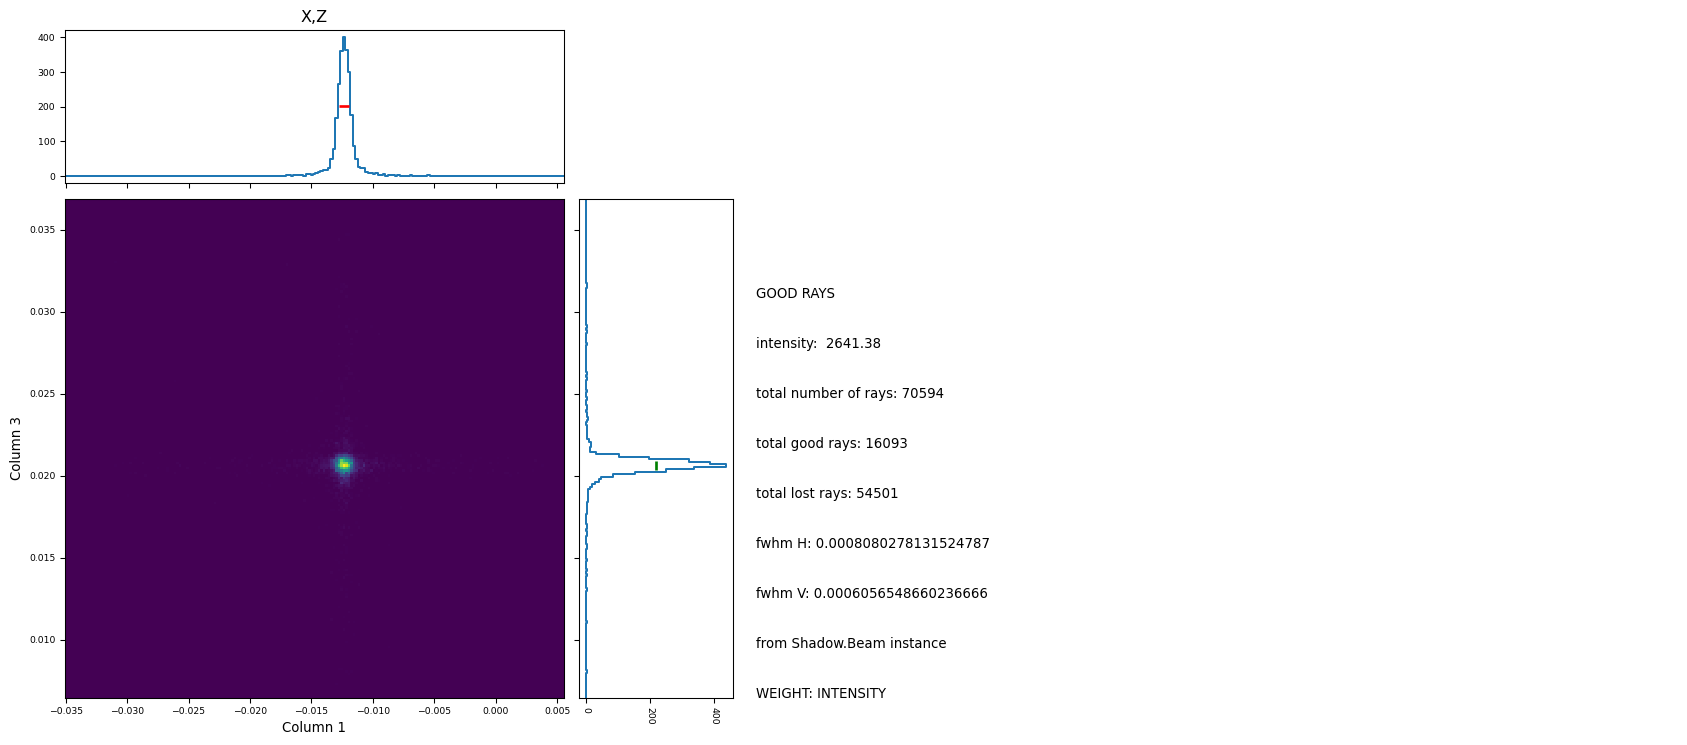

In [96]:
_ = plot_shadow_beam_spatial_distribution(opt_out_beam)

In [13]:
initial_hists_dws = [get_shadow_beam_spatial_distribution(ob) for ob in initial_out_beams]
initial_hists, initial_dws = zip(*initial_hists_dws)

In [14]:
initial_peaks = [dw.get_parameter('peak_intensity') for dw in initial_dws]
initial_h_fwhms = [dw.get_parameter('h_fwhm') for dw in initial_dws]
initial_v_fwhms = [dw.get_parameter('v_fwhm') for dw in initial_dws]

In [15]:
final_hists_dws = [get_shadow_beam_spatial_distribution(ob) for ob in final_out_beams]
final_hists, final_dws = zip(*final_hists_dws)

In [16]:
final_peaks = [dw.get_parameter('peak_intensity') for dw in final_dws]
final_h_fwhms = [dw.get_parameter('h_fwhm') for dw in final_dws]
final_v_fwhms = [dw.get_parameter('v_fwhm') for dw in final_dws]

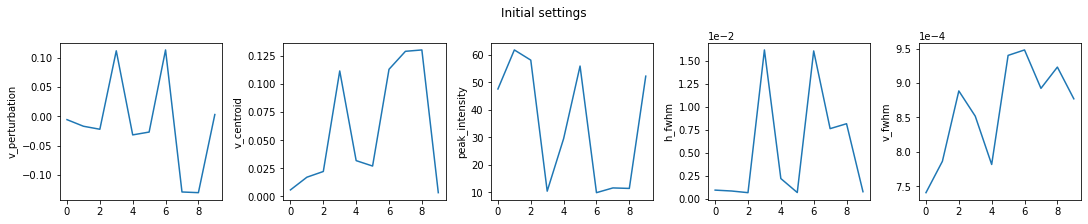

In [17]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes[0].plot(absolute_movements)
axes[0].set_ylabel('v_perturbation')

axes[1].plot(initial_centroids)
axes[1].set_ylabel('v_centroid')

axes[2].plot(initial_peaks)
axes[2].set_ylabel('peak_intensity')

axes[3].plot(initial_h_fwhms)
axes[3].set_ylabel('h_fwhm')
axes[3].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[4].plot(initial_v_fwhms)
axes[4].set_ylabel('v_fwhm')
axes[4].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('Initial settings')
fig.savefig(f'{fig_save_path}/hkb_4_initial_metrics.png', bbox_inches='tight')

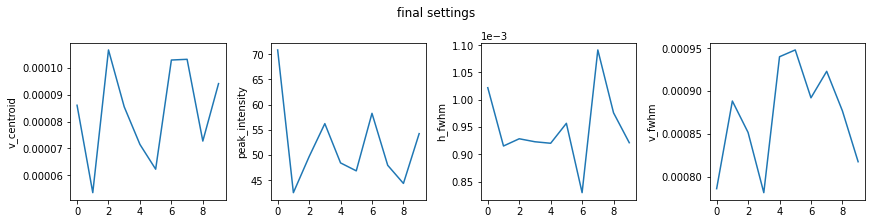

In [18]:
fig, axes = plt.subplots(1, 4, figsize=[12,3], constrained_layout=True)

axes[0].plot(final_centroids)
axes[0].set_ylabel('v_centroid')

axes[1].plot(final_peaks)
axes[1].set_ylabel('peak_intensity')

axes[2].plot(final_h_fwhms)
axes[2].set_ylabel('h_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[3].plot(final_v_fwhms)
axes[3].set_ylabel('v_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('final settings')
fig.savefig(f'{fig_save_path}/hkb_4_final_metrics.png', bbox_inches='tight')

/Applications/Oasys1.2.app/Contents/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


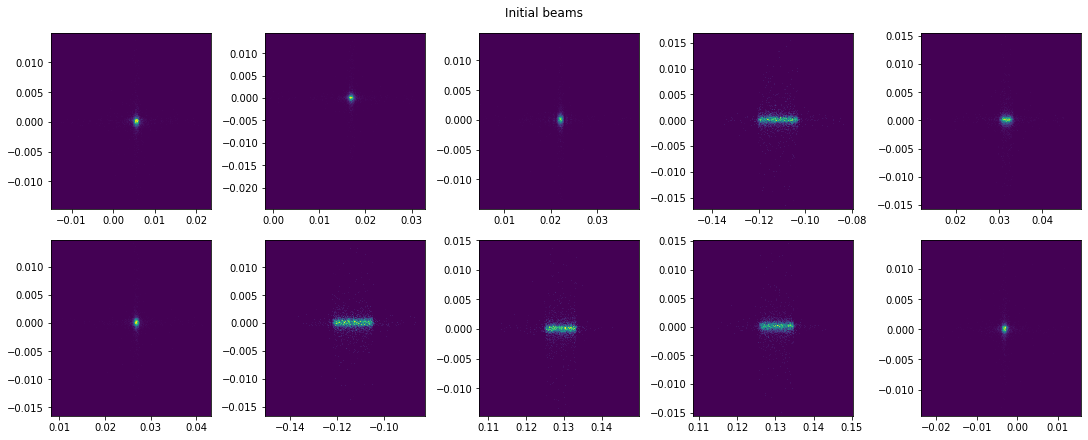

In [19]:
fig, axes = plt.subplots(2, 5, figsize=[15,6], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(initial_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D.T)
    
    
fig.suptitle('Initial beams')
fig.savefig(f'{fig_save_path}/hkb_4_initial_beams.png', bbox_inches='tight')

/Applications/Oasys1.2.app/Contents/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


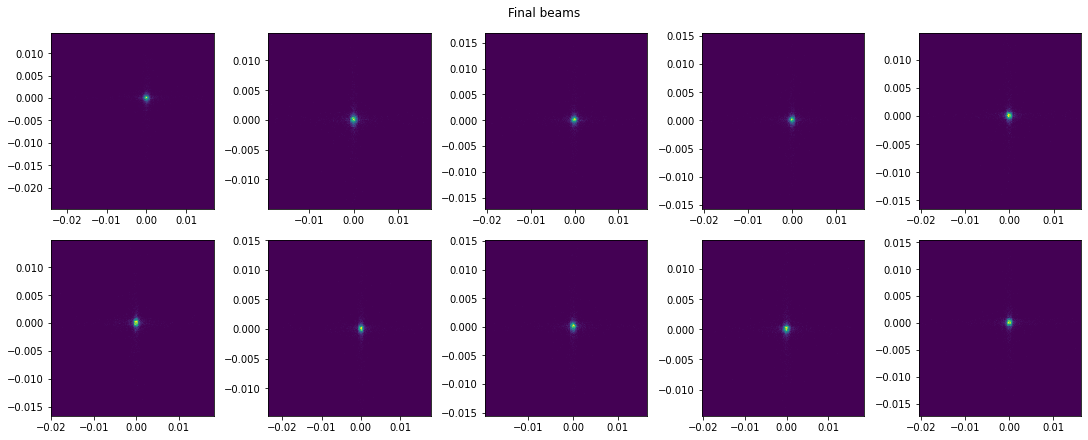

In [20]:
fig, axes = plt.subplots(2, 5, figsize=[15,6], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(final_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D.T)
    
    
fig.suptitle('Final beams')
fig.savefig(f'{fig_save_path}/hkb_4_final_beams.png', bbox_inches='tight')

In [21]:
clean_up()